## Exploração dos dados brutos

### Análise Exploratória dos Dados (EDA)
Este notebook realiza a análise exploratória dos dados de vazão (ANA) e dos dados climáticos (NASA POWER)
para a estação 3936 – Rio Guaporé, localizada em Pontes e Lacerda (MT).

O objetivo é compreender o comportamento temporal da vazão, possíveis padrões sazonais, identificar falhas,
eventos extremos, e analisar a relação entre variáveis climáticas e a vazão, preparando o terreno para
modelagem preditiva.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

df_vazao = pd.read_parquet('../data_lake/raw/dados_vazao_9727_2025-11-27.parquet')
df_clima  = pd.read_parquet('../data_lake/raw/dados_climatico_9727_2025-11-27.parquet')

display(df_vazao.head())
display(df_clima.head())

,data_vazao,vazao,codigo_bacia,codigo_sub_bacia,co_estacao,latitude,longitude,cidade,estado,rio
0,1945-08-01,NaN,8,81,9727,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO
1,1945-08-02,NaN,8,81,9727,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO
2,1945-08-03,NaN,8,81,9727,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO
3,1945-08-04,NaN,8,81,9727,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO
4,1945-08-05,NaN,8,81,9727,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO


,temp_media,umidade_relativa,precipitacao,data,cod_estacao
0,21.48,75.94,0.16,1981-01-01,9727
1,20.88,74.86,0.05,1981-01-02,9727
2,21.90,79.95,3.50,1981-01-03,9727
3,22.87,85.23,10.00,1981-01-04,9727
4,22.19,89.11,18.22,1981-01-05,9727


In [2]:
df_vazao.head(30)

,data_vazao,vazao,codigo_bacia,codigo_sub_bacia,co_estacao,latitude,longitude,cidade,estado,rio
0,1945-08-01,NaN,8,81,9727,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO
1,1945-08-02,NaN,8,81,9727,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO
2,1945-08-03,NaN,8,81,9727,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO
3,1945-08-04,NaN,8,81,9727,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO
4,1945-08-05,NaN,8,81,9727,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO
5,1945-08-06,NaN,8,81,9727,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO
6,1945-08-07,NaN,8,81,9727,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO
7,1945-08-08,NaN,8,81,9727,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO
8,1945-08-09,NaN,8,81,9727,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO
9,1945-08-10,NaN,8,81,9727,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO


In [3]:
# Análise inicial dos dados
df_vazao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29295 entries, 0 to 29294
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_vazao        29295 non-null  object 
 1   vazao             28734 non-null  float64
 2   codigo_bacia      29295 non-null  int64  
 3   codigo_sub_bacia  29295 non-null  int64  
 4   co_estacao        29295 non-null  int64  
 5   latitude          29295 non-null  object 
 6   longitude         29295 non-null  object 
 7   cidade            29295 non-null  object 
 8   estado            29295 non-null  object 
 9   rio               29295 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 2.2+ MB


In [4]:
df_clima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16401 entries, 0 to 16400
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   temp_media        16401 non-null  float64       
 1   umidade_relativa  16401 non-null  float64       
 2   precipitacao      16401 non-null  float64       
 3   data              16401 non-null  datetime64[ns]
 4   cod_estacao       16401 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 640.8 KB


In [5]:
# Verificando valores nulos
df_vazao.isna().sum()

data_vazao            0
vazao               561
codigo_bacia          0
codigo_sub_bacia      0
co_estacao            0
latitude              0
longitude             0
cidade                0
estado                0
rio                   0
dtype: int64

In [6]:
df_vazao.describe()

,vazao,codigo_bacia,codigo_sub_bacia,co_estacao
count,28734.000000,29295.0,29295.0,29295.0
mean,7.765685,8.0,81.0,9727.0
std,5.033651,0.0,0.0,0.0
min,1.972000,8.0,81.0,9727.0
25%,4.943500,8.0,81.0,9727.0
50%,6.541100,8.0,81.0,9727.0
75%,8.850800,8.0,81.0,9727.0
max,99.011497,8.0,81.0,9727.0


In [7]:
df_clima.describe()

,temp_media,umidade_relativa,precipitacao,data,cod_estacao
count,16401.000000,16401.000000,16401.000000,16401,16401.0
mean,18.388114,81.804117,4.143572,2003-06-15 00:00:00,9727.0
min,-999.000000,-999.000000,-999.000000,1981-01-01 00:00:00,9727.0
25%,15.870000,77.130000,0.150000,1992-03-24 00:00:00,9727.0
50%,18.880000,82.890000,1.240000,2003-06-15 00:00:00,9727.0
75%,21.500000,87.640000,5.430000,2014-09-05 00:00:00,9727.0
max,28.290000,99.040000,101.890000,2025-11-26 00:00:00,9727.0
std,8.821411,11.718971,10.499890,NaN,0.0


In [8]:
# Convertendo a coluna de datas para o tipo datetime
df_vazao['data_vazao'] = pd.to_datetime(df_vazao['data_vazao'])

df_vazao = df_vazao.sort_values('data_vazao')

In [9]:
# Verificando datas faltantes na série temporal de vazão
full_range = pd.date_range(df_vazao['data_vazao'].min(), df_vazao['data_vazao'].max(), freq='D')

print('Total de datas esperadas:', len(full_range))
print('Total de datas encontradas:', df_vazao['data_vazao'].nunique())

missing_dates = full_range.difference(df_vazao['data_vazao'])

print('Datas faltantes:')
print(missing_dates)

Total de datas esperadas: 28764
Total de datas encontradas: 28760
Datas faltantes:
DatetimeIndex(['1965-03-31', '1986-03-31', '1989-01-31', '1993-01-31'], dtype='datetime64[ns]', freq=None)


In [10]:
df_vazao['data_vazao'].is_unique

False

In [11]:
duplicadas = df_vazao[df_vazao.duplicated(subset=['data_vazao'], keep=False)]
duplicadas

,data_vazao,vazao,codigo_bacia,codigo_sub_bacia,co_estacao,latitude,longitude,cidade,estado,rio
61,1945-10-01,3.5737,8,81,9727,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO
62,1945-10-01,NaN,8,81,9727,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO
123,1945-12-01,NaN,8,81,9727,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO
124,1945-12-01,2.5538,8,81,9727,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO
214,1946-03-01,NaN,8,81,9727,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO
...,...,...,...,...,...,...,...,...,...,...
29140,2023-12-01,NaN,8,81,9727,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO
29231,2024-03-01,7.9373,8,81,9727,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO
29232,2024-03-01,NaN,8,81,9727,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO
29233,2024-03-02,7.2050,8,81,9727,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO


In [12]:
duplicadas[duplicadas['vazao'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 62 to 29234
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data_vazao        500 non-null    datetime64[ns]
 1   vazao             0 non-null      float64       
 2   codigo_bacia      500 non-null    int64         
 3   codigo_sub_bacia  500 non-null    int64         
 4   co_estacao        500 non-null    int64         
 5   latitude          500 non-null    object        
 6   longitude         500 non-null    object        
 7   cidade            500 non-null    object        
 8   estado            500 non-null    object        
 9   rio               500 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 43.0+ KB


In [13]:
vazao_nula = df_vazao[df_vazao['vazao'].isna()]
vazao_nula

,data_vazao,vazao,codigo_bacia,codigo_sub_bacia,co_estacao,latitude,longitude,cidade,estado,rio
0,1945-08-01,NaN,8,81,9727,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO
1,1945-08-02,NaN,8,81,9727,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO
2,1945-08-03,NaN,8,81,9727,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO
3,1945-08-04,NaN,8,81,9727,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO
4,1945-08-05,NaN,8,81,9727,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO
...,...,...,...,...,...,...,...,...,...,...
29077,2023-10-01,NaN,8,81,9727,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO
29140,2023-12-01,NaN,8,81,9727,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO
29232,2024-03-01,NaN,8,81,9727,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO
29234,2024-03-02,NaN,8,81,9727,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO


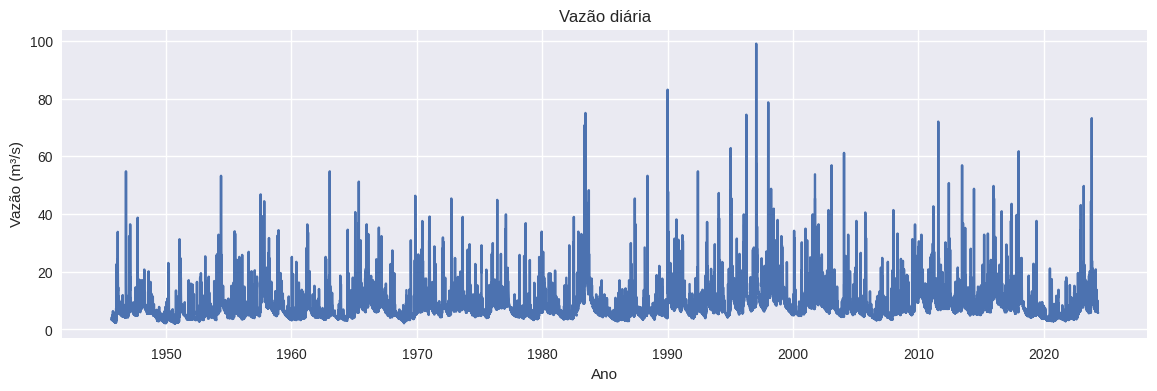

In [14]:
plt.figure(figsize=(14,4))
plt.plot(df_vazao['data_vazao'], df_vazao['vazao'])
plt.title("Vazão diária")
plt.xlabel("Ano")
plt.ylabel("Vazão (m³/s)")
plt.grid(True)
plt.show()

In [15]:
df_vazao[df_vazao['vazao'] == 0]

,data_vazao,vazao,codigo_bacia,codigo_sub_bacia,co_estacao,latitude,longitude,cidade,estado,rio


## 1. Qualidade dos dados climáticos (NASA POWER)

A análise do dataset climático mostrou que não há inconsistências relevantes nos dados.
Foram verificados:

- Ausência de valores nulos;

- Intervalo contínuo e sem lacunas na coluna de data;

- Variáveis climáticas dentro de faixas típicas para a região.

Dessa forma, o dataset climático não requer tratamentos adicionais antes da modelagem.

## 2. Qualidade dos dados de vazão (ANA)

O dataset de vazão apresentou problemas estruturais e de qualidade que precisam ser tratados para permitir sua utilização em modelos de previsão. A seguir, os principais pontos identificados na análise exploratória:

### 2.1 Diferença entre datas esperadas e registros presentes

O período analisado contém 3439 dias de calendário contínuo.

No entanto:

- Registros encontrados: 3503

- Registros esperados: 3439 (sem considerar as 27 primeiras linhas onde as vazões são nulas)

- Diferença: 64 dias a mais no dataset

### 2.2 Verificação de datas faltantes

Após reconstruir o período completo e comparar com as datas disponíveis foi confirmado que a única causa da diferença é a duplicação de registros, não uma interrupção real da série.

### 2.3 Datas duplicadas

A verificação de duplicidade resultou em 128 linhas duplicadas, distribuídas em 64 dias repetidos.

### 2.4 Vazões nulas associadas às duplicadas

Ao cruzar vazões nulas com as datas duplicadas:

- Total de vazões nulas: 92

- Em datas duplicadas: 54

- Em datas não duplicadas: 38

Isso indica que a maior parte das duplicações ocorre quando há dois registros para a mesma data: um válido e outro com vazão nula.

## Tranformação de dataframe

## 3. Recomendações de Tratamento dos Dados

Com base na análise, os seguintes tratamentos são recomendados:

### 3.1 Remover duplicadas e consolidar registros por data

Para cada data duplicada:

- Se houver um valor válido (não nulo), manter apenas o válido;

- Se todos os registros forem nulos, marcar como missing (NaN).

### 3.2 Garantir série temporal contínua

- Recriar o índice diário completo

- Validar por gaps

- Ordenar e padronizar

### 3.3 Imputar vazões faltantes

Três opções possíveis:

- Interpolação temporal (linear ou spline): boa para modelos estatísticos.

- Preenchimento baseado em precipitação antecedente: útil para modelos hidrológicos.

- Manter como NaN e deixar o modelo aprender: modelos LSTM podem lidar após preparação adequada

In [16]:
def remover_duplicatas_vazao(df):
    print("Removendo duplicatas")

    # 1. Remover duplicatas com vazão nula
    # Mantém as duplicatas onde pelo menos um tem vazão válida
    mask_dupe_null = df.index.duplicated(keep=False) & df['vazao'].isnull()
    df = df[~mask_dupe_null]

    # 2. Remover duplicatas restantes, mantendo a primeira
    df.drop_duplicates(subset='data_vazao', keep='first', inplace=True)

    # Garantir unicidade da coluna data
    if not df['data_vazao'].is_unique:
        raise ValueError("Ainda existem datas duplicadas após o tratamento.")

    return df

In [17]:
def adicionar_dados_faltantes_vazao(df):
    print("Adicionando dados faltantes")

    # 3. Remover linhas onde vazão é nula
    df.dropna(subset=['vazao'], inplace=True)

    # 4. Indexar pelo campo data
    df.set_index('data_vazao', inplace=True)
    df.sort_index(inplace=True)

    # 5. Criar o range completo de datas
    full_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')
    df = df.reindex(full_range)

    # 6. Interpolar vazão nos dias faltantes
    df['vazao'] = df['vazao'].interpolate(method='time', limit_direction='both')

    # 7. Preencher colunas categóricas
    cat_cols = df.columns.drop('vazao')

    for col in cat_cols:
        unique_vals = df[col].dropna().unique()

        if len(unique_vals) == 1:
            # Todas são iguais → preencher
            df[col] = df[col].fillna(unique_vals[0])
        else:
            raise ValueError(
                f"A coluna '{col}' possui valores distintos, "
                "o que não deveria ocorrer para uma única estação."
            )

    # 8. Validar que não restaram nulos
    if df.isnull().any().any():
        raise ValueError("Ainda existem valores nulos após a interpolação e preenchimento.")

    return df

In [18]:
def tratar_dados_vazao(df):
    df = remover_duplicatas_vazao(df)
    df = adicionar_dados_faltantes_vazao(df)

    return df

In [19]:
df_vazao = pd.read_parquet('../data_lake/raw/dados_vazao_9727_2025-11-27.parquet')

In [20]:
df_vazao = remover_duplicatas_vazao(df_vazao)

Removendo duplicatas


In [21]:
df_vazao

,data_vazao,vazao,codigo_bacia,codigo_sub_bacia,co_estacao,latitude,longitude,cidade,estado,rio
0,1945-08-01,NaN,8,81,9727,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO
1,1945-08-02,NaN,8,81,9727,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO
2,1945-08-03,NaN,8,81,9727,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO
3,1945-08-04,NaN,8,81,9727,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO
4,1945-08-05,NaN,8,81,9727,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO
...,...,...,...,...,...,...,...,...,...,...
29290,2024-04-27,5.7555,8,81,9727,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO
29291,2024-04-28,5.7555,8,81,9727,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO
29292,2024-04-29,5.7555,8,81,9727,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO
29293,2024-04-30,5.7555,8,81,9727,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO


In [22]:
df_vazao.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28760 entries, 0 to 29294
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_vazao        28760 non-null  object 
 1   vazao             28385 non-null  float64
 2   codigo_bacia      28760 non-null  int64  
 3   codigo_sub_bacia  28760 non-null  int64  
 4   co_estacao        28760 non-null  int64  
 5   latitude          28760 non-null  object 
 6   longitude         28760 non-null  object 
 7   cidade            28760 non-null  object 
 8   estado            28760 non-null  object 
 9   rio               28760 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 2.4+ MB


In [23]:
df_vazao = adicionar_dados_faltantes_vazao(df_vazao)

Adicionando dados faltantes


In [24]:
df_vazao.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28734 entries, 1945-08-30 to 2024-04-30
Freq: D
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   vazao             28734 non-null  float64
 1   codigo_bacia      28734 non-null  float64
 2   codigo_sub_bacia  28734 non-null  float64
 3   co_estacao        28734 non-null  float64
 4   latitude          28734 non-null  object 
 5   longitude         28734 non-null  object 
 6   cidade            28734 non-null  object 
 7   estado            28734 non-null  object 
 8   rio               28734 non-null  object 
dtypes: float64(4), object(5)
memory usage: 2.2+ MB


## Engenharia de atributos

### Diferenças entre Pearson, Spearman e Kendall

Para analisar a relação entre a vazão e as variáveis climáticas e derivadas, utilizamos três métodos diferentes de correlação. Cada um deles captura um tipo diferente de relacionamento entre duas variáveis:

1. Pearson

- Mede correlação linear.

- Assume que as variáveis têm distribuição aproximadamente normal.

- É sensível a outliers.

- Bom quando esperamos relações do tipo: “se X aumenta em 1 unidade, Y aumenta proporcionalmente”.

Interpretação: captura apenas relacionamentos lineares.

2. Spearman

- Mede correlação através dos ranks (ordem dos valores).

- Captura relações monotônicas, sejam elas lineares ou não.

- Muito menos sensível a outliers do que Pearson.

- Ideal para séries temporais de clima e hidrologia, que raramente são lineares.

Interpretação: identifica se ao aumentar X, Y tende a aumentar ou diminuir, mesmo sem linearidade.

3. Kendall

- Também é baseado em rankings, mas mede consistência de pares ordenados.

- Mais robusto que Spearman, porém costuma produzir valores numéricos menores.

- Indicado quando há: muitos empates nos dados, ruídos, distribuições irregulares, séries temporais com variabilidade alta.

Interpretação: mede a confiabilidade do relacionamento monotônico.

In [26]:
df_vazao = pd.read_parquet('../data_lake/raw/dados_vazao_9727_2025-11-27.parquet')
df_vazao = tratar_dados_vazao(df_vazao)

# padronização de datas
df_clima['data'] = pd.to_datetime(df_clima['data'])

df = pd.merge(df_vazao, df_clima, left_index=True, right_on=['data'], how='inner')
df.set_index('data', inplace=True)
df.sort_index()

Removendo duplicatas
Adicionando dados faltantes


,vazao,codigo_bacia,codigo_sub_bacia,co_estacao,latitude,longitude,cidade,estado,rio,temp_media,umidade_relativa,precipitacao,cod_estacao
data,,,,,,,,,,,,,
1981-01-01,6.3592,8.0,81.0,9727.0,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO,21.48,75.94,0.16,9727
1981-01-02,6.0029,8.0,81.0,9727.0,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO,20.88,74.86,0.05,9727
1981-01-03,5.8286,8.0,81.0,9727.0,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO,21.90,79.95,3.50,9727
1981-01-04,6.0029,8.0,81.0,9727.0,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO,22.87,85.23,10.00,9727
1981-01-05,7.8846,8.0,81.0,9727.0,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO,22.19,89.11,18.22,9727
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-26,5.8399,8.0,81.0,9727.0,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO,21.89,77.51,0.08,9727
2024-04-27,5.7555,8.0,81.0,9727.0,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO,22.50,73.91,0.23,9727
2024-04-28,5.7555,8.0,81.0,9727.0,-24.7561,-49.3403,DOUTOR ULYSSES,PARANÁ,RIO TURVO,23.16,75.63,1.46,9727


In [27]:
def generate_graphic(x, y = None):
    plt.figure(figsize=(12, 8))
    
    plt.plot(x.index, x, label='Valor X')
    if y is not None:
        plt.plot(y.index, y, label='Valor Y')
    
    plt.xlabel('Índice')
    plt.ylabel('Valores')
    plt.title(f'Gráfico de comparação')
    plt.legend()
    plt.show()

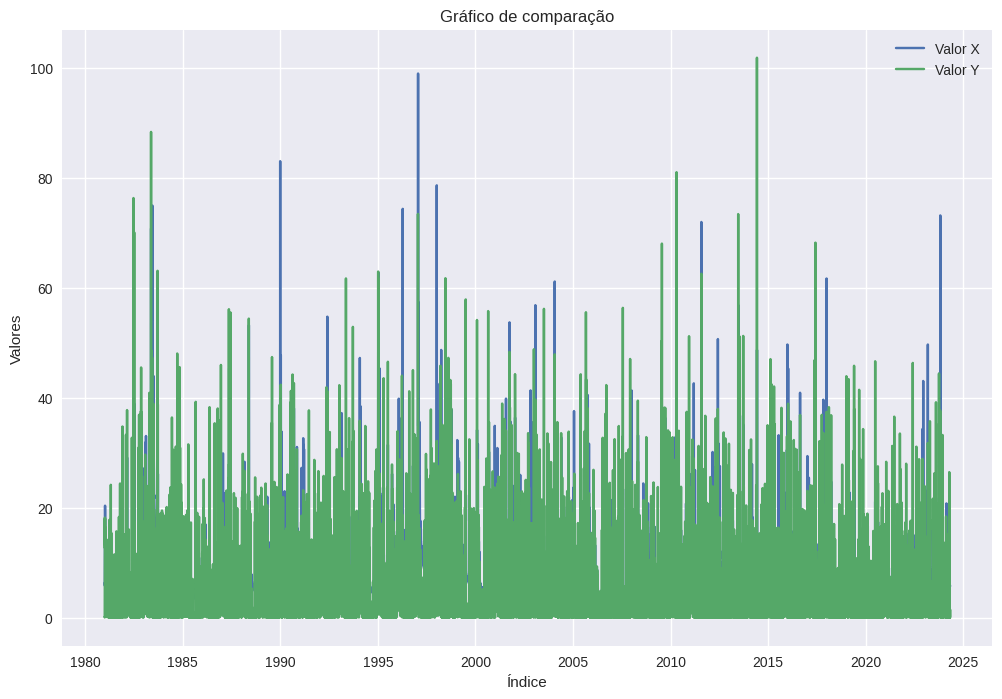

In [28]:
generate_graphic(df['vazao'], df['precipitacao'])

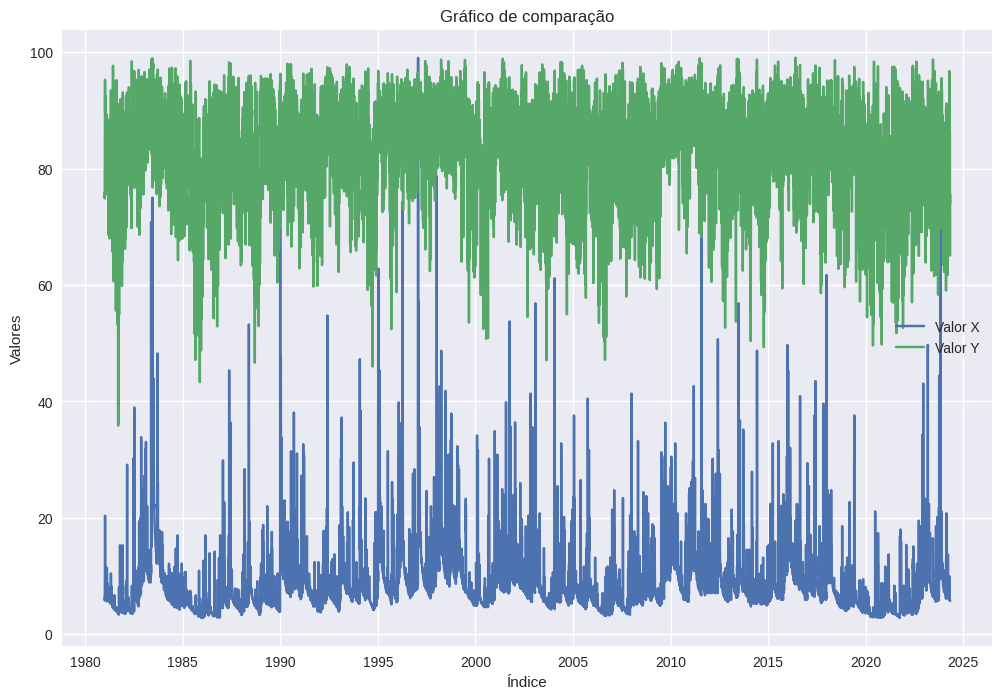

In [29]:
generate_graphic(df['vazao'], df['umidade_relativa'])

In [30]:
df_teste1 = df.copy()
df_teste1.drop(columns=['codigo_bacia', 'codigo_sub_bacia', 'co_estacao', 'latitude', 'longitude', 'cidade', 'estado', 'rio', 'cod_estacao'], inplace=True)

In [31]:
for i in range(1, 2):
    df_teste1[f'vazao_t-{i}'] = df['vazao'].shift(i) # vazão do dia anterior
    df_teste1[f'precip_t-{i}'] = df['precipitacao'].shift(i) # precipitação do dia anterior
    df_teste1[f'temp_t-{i}'] = df['temp_media'].shift(i) # temperatura do dia anterior
    df_teste1[f'umidade_t-{i}'] = df['umidade_relativa'].shift(i) # umidade do dia anterior

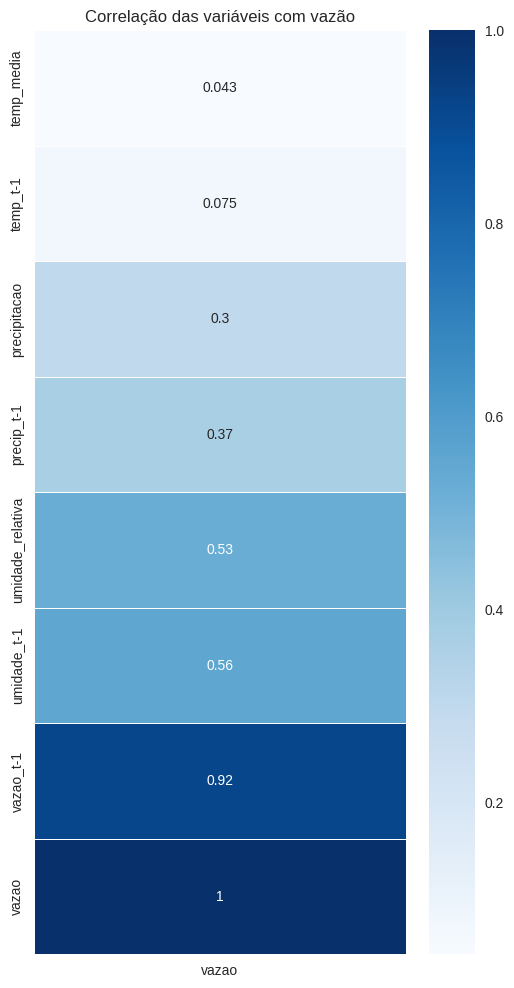

In [32]:
corr_vazao = df_teste1.corr(method='spearman')['vazao'].sort_values()

fig, ax = plt.subplots(figsize=(6, 12))
sns.heatmap(
    corr_vazao.to_frame(),
    annot=True,
    cmap='Blues',
    linewidths=.5,
    ax=ax
)
plt.title("Correlação das variáveis com vazão")
plt.show()

In [33]:
df_teste2 = df.copy()
df_teste2.drop(columns=['codigo_bacia', 'codigo_sub_bacia', 'co_estacao', 'latitude', 'longitude', 'cidade', 'estado', 'rio', 'cod_estacao'], inplace=True)

In [34]:
colunas = ['vazao', 'precipitacao', 'temp_media', 'umidade_relativa']

for i in range(3, 10, 3):
    for coluna in colunas:
        df_teste2[f'{coluna}_roll{i}_mean'] = df_teste2[coluna].rolling(window=i).mean()
        # Desvio padrão móvel de 7 dias da vazão (variabilidade semanal)
        df_teste2[f'{coluna}_roll{i}_std'] = df_teste2[coluna].rolling(window=i).std()
        # Acúmulo de precipitação em 7 dias (soma dos últimos 7 dias)
        df_teste2[f'{coluna}_roll{i}_7dias'] = df_teste2[coluna].rolling(window=i).sum()

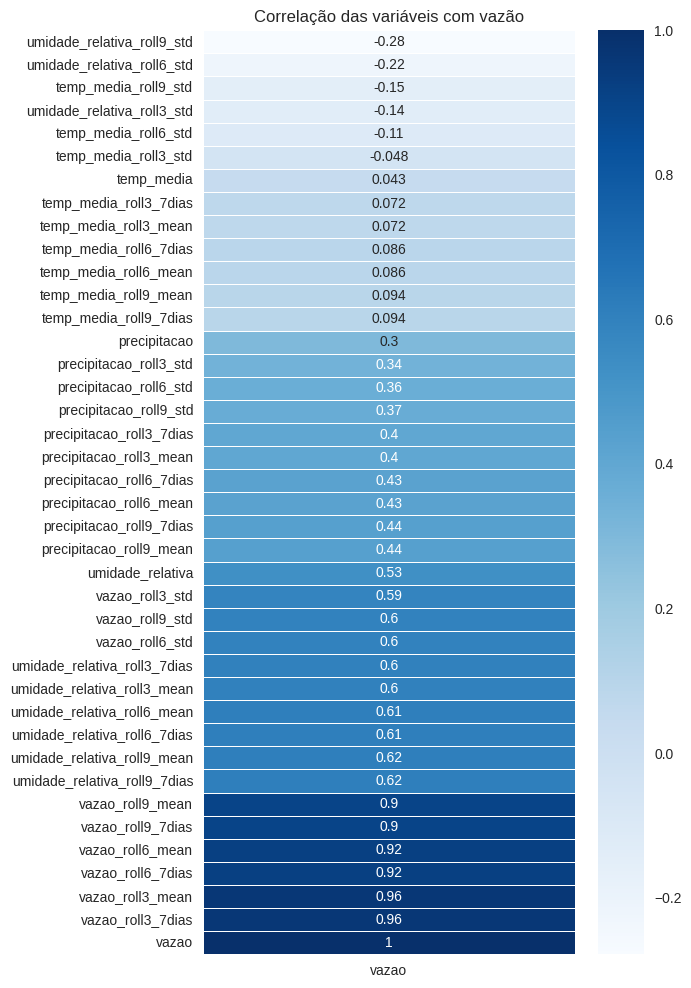

In [35]:
corr_vazao = df_teste2.corr(method='spearman')['vazao'].sort_values()

fig, ax = plt.subplots(figsize=(6, 12))
sns.heatmap(
    corr_vazao.to_frame(),
    annot=True,
    cmap='Blues',
    linewidths=.5,
    ax=ax
)
plt.title("Correlação das variáveis com vazão")
plt.show()

In [36]:
df_teste3 = df.copy()
df_teste3.drop(columns=['codigo_bacia', 'codigo_sub_bacia', 'co_estacao', 'latitude', 'longitude', 'cidade', 'estado', 'rio', 'cod_estacao'], inplace=True)

In [37]:
df_teste3['mes'] = df_teste3.index.month
df_teste3['mes_sin'] = np.sin(2 * np.pi * df_teste3['mes'] / 12)
df_teste3['mes_cos'] = np.cos(2 * np.pi * df_teste3['mes'] / 12)

In [38]:
def get_estacao(data):
    ano = data.year
    if pd.Timestamp(ano, 3, 20) <= data < pd.Timestamp(ano, 6, 21):
        return 'outono'
    elif pd.Timestamp(ano, 6, 21) <= data < pd.Timestamp(ano, 9, 22):
        return 'inverno'
    elif pd.Timestamp(ano, 9, 22) <= data < pd.Timestamp(ano, 12, 21):
        return 'primavera'
    else:
        return 'verao'

df_teste3['estacao'] = df_teste3.index.map(get_estacao)

df_teste3 = pd.get_dummies(df_teste3, columns=['estacao'], prefix='estacao')

In [39]:
df_teste3['vazao_diff1'] = df_teste3['vazao'].diff(periods=1)
df_teste3['vazao_diff2'] = df_teste3['vazao_diff1'].diff(1)

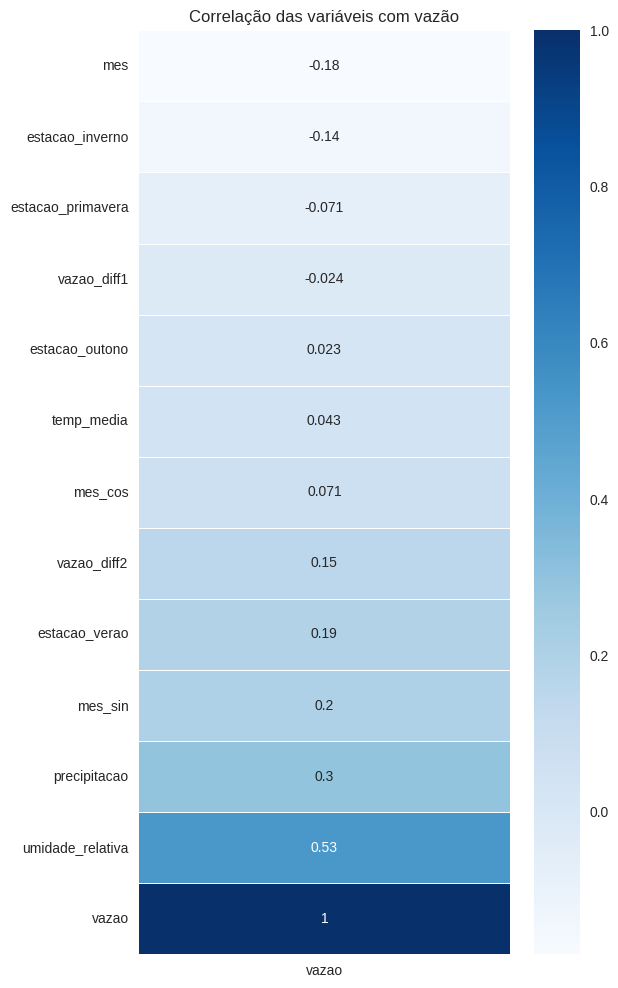

In [40]:
corr_vazao = df_teste3.corr(method='spearman')['vazao'].sort_values()

fig, ax = plt.subplots(figsize=(6, 12))
sns.heatmap(
    corr_vazao.to_frame(),
    annot=True,
    cmap='Blues',
    linewidths=.5,
    ax=ax
)
plt.title("Correlação das variáveis com vazão")
plt.show()

In [41]:
df_teste4 = df.copy()
df_teste4.drop(columns=['codigo_bacia', 'codigo_sub_bacia', 'co_estacao', 'latitude', 'longitude', 'cidade', 'estado', 'rio', 'cod_estacao'], inplace=True)

In [42]:
df_teste4['precipitacao_roll9_mean'] = df_teste4['precipitacao'].rolling(window=9).mean()
df_teste4['vazao_t1'] = df_teste4['vazao'].shift(1)
df_teste4['vazao_t2'] = df_teste4['vazao'].shift(2)

df_teste4["chuva_forte"] = (df_teste4["precipitacao"] > df_teste4["precipitacao"].quantile(0.90)).astype(int)
df_teste4["estiagem"] = (df_teste4["precipitacao_roll9_mean"] < df_teste4["precipitacao"].quantile(0.20)).astype(int)
df_teste4['solo_saturado'] = (df_teste4['precipitacao_roll9_mean'] > 5).astype(int)
df_teste4['vazao_log'] = np.log1p(df_teste4['vazao'])
df_teste4['precip_sqrt'] = np.sqrt(df_teste4['precipitacao'])
df_teste4['umidade_quad'] = df_teste4['umidade_relativa']**2
df_teste4['vazao_precip_inter'] = df_teste4['vazao_t1'] * df_teste4['precipitacao']
df_teste4['precip_umidade_inter'] = df_teste4['precipitacao'] * df_teste4['umidade_relativa']

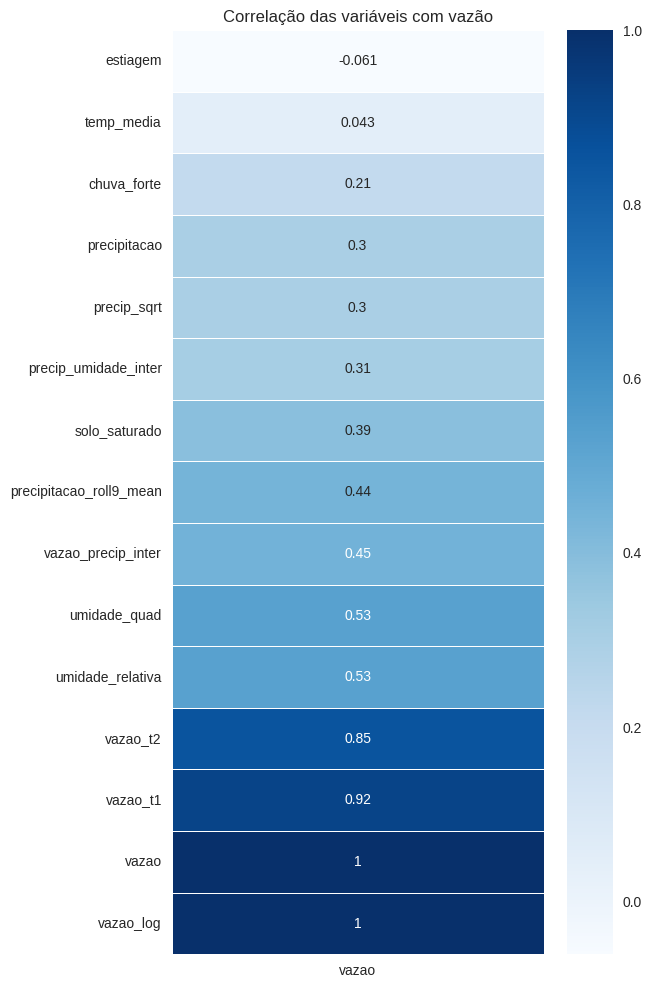

In [43]:
corr_vazao = df_teste4.corr(method='spearman')['vazao'].sort_values()

fig, ax = plt.subplots(figsize=(6, 12))
sns.heatmap(
    corr_vazao.to_frame(),
    annot=True,
    cmap='Blues',
    linewidths=.5,
    ax=ax
)
plt.title("Correlação das variáveis com vazão")
plt.show()

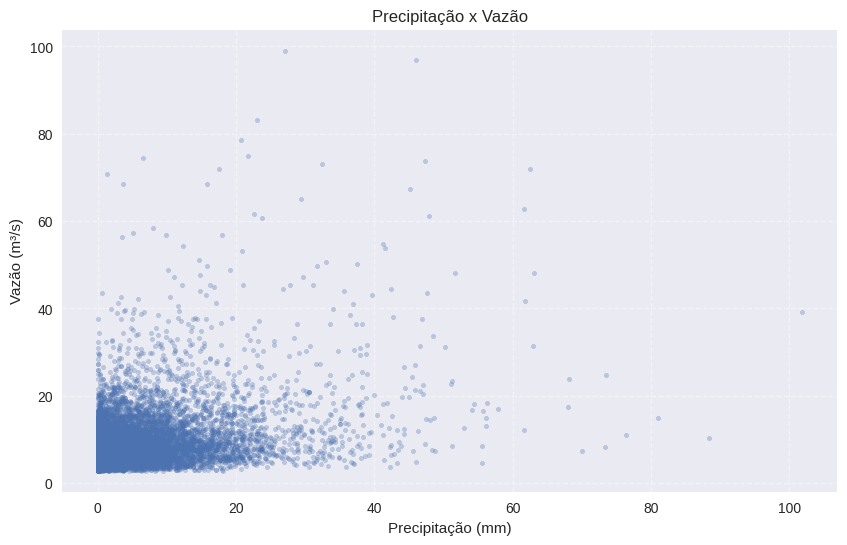

In [44]:
plt.figure(figsize=(10,6))
plt.scatter(df['precipitacao'], df['vazao'], alpha=0.3, s=10)
plt.xlabel("Precipitação (mm)")
plt.ylabel("Vazão (m³/s)")
plt.title("Precipitação x Vazão")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()
plt.show()

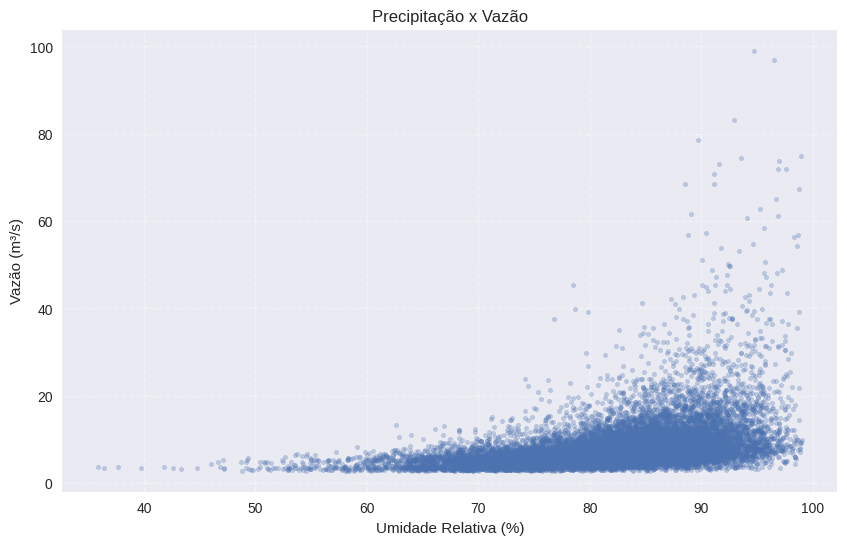

In [45]:
plt.figure(figsize=(10,6))
plt.scatter(df['umidade_relativa'], df['vazao'], alpha=0.3, s=10)
plt.xlabel("Umidade Relativa (%)")
plt.ylabel("Vazão (m³/s)")
plt.title("Precipitação x Vazão")
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

## Conclusão geral

Os métodos de correlação mostraram que:

- A própria vazão passada é o melhor preditor da vazão futura (forte memória temporal da série).

- Precipitação acumulada e umidade relativa são as variáveis climáticas mais úteis.

- Temperatura teve pouca relevância.

- Componentes sazonais (mês e estação) melhoram o modelo de previsão por capturar ciclos anuais.

In [46]:
def get_estacao(data):
    ano = data.year
    if pd.Timestamp(ano, 3, 20) <= data < pd.Timestamp(ano, 6, 21):
        return 'outono'
    elif pd.Timestamp(ano, 6, 21) <= data < pd.Timestamp(ano, 9, 22):
        return 'inverno'
    elif pd.Timestamp(ano, 9, 22) <= data < pd.Timestamp(ano, 12, 21):
        return 'primavera'
    else:
        return 'verao'

def gerar_features_finais(df):
    # 1. Lags (memória)
    df["vazao_t1"] = df["vazao"].shift(1)
    df["umidade_t1"] = df["precipitacao"].shift(1)

    # 2. Rolling
    for col in ["vazao", "precipitacao", "umidade_relativa"]:
        for w in [3, 6, 9]:
            df[f"{col}_roll{w}_mean"]  = df[col].rolling(w).mean()

    # 3. Sazonalidade
    df["mes"] = df.index.month
    df["mes_sin"] = np.sin(2 * np.pi * df.index.month / 12)
    df["mes_cos"] = np.cos(2 * np.pi * df.index.month / 12)

    df['estacao'] = df.index.map(get_estacao)

    df = pd.get_dummies(df, columns=['estacao'], prefix='estacao')

    return df

In [47]:
df = gerar_features_finais(df)

In [48]:
df.columns

Index(['vazao', 'codigo_bacia', 'codigo_sub_bacia', 'co_estacao', 'latitude',
       'longitude', 'cidade', 'estado', 'rio', 'temp_media',
       'umidade_relativa', 'precipitacao', 'cod_estacao', 'vazao_t1',
       'umidade_t1', 'vazao_roll3_mean', 'vazao_roll6_mean',
       'vazao_roll9_mean', 'precipitacao_roll3_mean',
       'precipitacao_roll6_mean', 'precipitacao_roll9_mean',
       'umidade_relativa_roll3_mean', 'umidade_relativa_roll6_mean',
       'umidade_relativa_roll9_mean', 'mes', 'mes_sin', 'mes_cos',
       'estacao_inverno', 'estacao_outono', 'estacao_primavera',
       'estacao_verao'],
      dtype='object')